# Contents
<a href= "s1"> 1) Introduction</a>

<a href= "s2"> 2) data wrangling, data cleaning</a>
    
<a href= "s3"> 3) plot the hourly distribution of detection by histogram & density plot</a>
    
<a href= "s4"> 4) Hourly Analysis</a>
    
<a href= "s5"> 5) Hourly analysis plot of shared period</a>

<a href= "s6"> 6) Identifying Correlations</a>

<a href= "s7"> 7) Heatmaps</a>
    
<a href= "s8"> 8) Conclusion</a>

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from datetime import datetime as dt,timedelta as td
import os
import string
import seaborn as sns

from plotly.offline import init_notebook_mode,iplot
import plotly.graph_objects as go
import cufflinks as cf
init_notebook_mode(connected=True)


# 1. Introduction

Data Exploration

In [2]:
# Reading Detector_1 data

In [3]:
df_1= pd.read_csv("Detector_1", sep="-", header = None, delimiter=r"\s+")


In [4]:
df_1.columns = ['size', 'Month', 'Date', 'Time','ID']


In [5]:
df_1

,size,Month,Date,Time,ID
0,151284,Apr,19,11:37,0-01-20200419063614
1,48054,Apr,21,12:50,0-01-20200421074934
2,187588,Apr,21,13:55,0-01-20200421085439
3,51584,Apr,21,14:37,0-01-20200421143636
4,63522,Apr,22,08:40,0-01-20200422083937
...,...,...,...,...,...
830,120314,Apr,25,18:27,0-57-20200425182654
831,546064,Apr,25,18:47,0-58-20200425184600
832,184202,Apr,25,18:51,0-59-20200425185051
833,625583,Apr,25,19:16,0-60-20200425191521


* *size: the size, in bytes, of the detection file*
    
* *Month: the month of detection*
    
* *Date: the day of detection*
    
* *Time: the time of day of detection*
    
* *ID: the name of the detection file it's referring to (contains the timestamp in format # - ## - YYYYMMDDHHMMSS)*

In [6]:
#Checking the shape of the Detector_1 dataset
df_1.shape

(835, 5)

In [7]:
# Checking descriptive statistics
df_1.describe()

,size,Date
count,8.350000e+02,835.000000
mean,4.676162e+05,18.622754
std,4.122638e+05,11.154365
min,1.828000e+04,1.000000
25%,1.382780e+05,4.000000
50%,3.973330e+05,24.000000
75%,6.622460e+05,27.000000
max,2.888647e+06,30.000000


Here df_1 has size count of 8.350000e+02 and Date count of 835.000000. From above describe function we can see mean, std, min and max etc.

In [8]:
# Checking the top 5 rows
df_1.head()

,size,Month,Date,Time,ID
0,151284,Apr,19,11:37,0-01-20200419063614
1,48054,Apr,21,12:50,0-01-20200421074934
2,187588,Apr,21,13:55,0-01-20200421085439
3,51584,Apr,21,14:37,0-01-20200421143636
4,63522,Apr,22,08:40,0-01-20200422083937


In [9]:
df_1['Year'] = df_1['ID'].str[5:13]
df_1['ID'] = df_1['ID'].str[2:4]

In [10]:
df_1['Year'] = pd.to_datetime(df_1['Year'], format='%Y%m%d')

In [11]:
df_1['DateTime'] = pd.to_datetime(df_1['Year'].apply(str)+' '+df_1['Time'])

In [12]:
df_1.drop(['Time','Year','Month','Date'],axis=1,inplace = True)

In [13]:
df_1['Year'] = pd.DatetimeIndex(df_1['DateTime']).year
df_1['Month'] = pd.DatetimeIndex(df_1['DateTime']).month
df_1['Date'] = pd.DatetimeIndex(df_1['DateTime']).day
df_1['Hour'] = pd.DatetimeIndex(df_1['DateTime']).hour
df_1['Minute'] = pd.DatetimeIndex(df_1['DateTime']).minute
df_1['Second'] = pd.DatetimeIndex(df_1['DateTime']).second

The files with sizes less than 50KB are false detection and should be removed.

In [14]:
#the files with sizes less than 50KB are false detection
Detector_1 = df_1[df_1['size'] > 50000]
Detector_1.head()

,size,ID,DateTime,Year,Month,Date,Hour,Minute,Second
0,151284,01,2020-04-19 11:37:00,2020,4,19,11,37,0
2,187588,01,2020-04-21 13:55:00,2020,4,21,13,55,0
3,51584,01,2020-04-21 14:37:00,2020,4,21,14,37,0
4,63522,01,2020-04-22 08:40:00,2020,4,22,8,40,0
5,86802,01,2020-04-22 13:26:00,2020,4,22,13,26,0


We can drop size and ID, that is not needed in data analysis part

In [15]:
# drop size and ID
Detector_1.drop(['size','ID'],axis=1,inplace = True)

Dropping duplicates

In [16]:
Detector_1.drop_duplicates(subset="DateTime", inplace=True)

In [17]:
Detector_1.head()

,DateTime,Year,Month,Date,Hour,Minute,Second
0,2020-04-19 11:37:00,2020,4,19,11,37,0
2,2020-04-21 13:55:00,2020,4,21,13,55,0
3,2020-04-21 14:37:00,2020,4,21,14,37,0
4,2020-04-22 08:40:00,2020,4,22,8,40,0
5,2020-04-22 13:26:00,2020,4,22,13,26,0


In [18]:
detect_1= Detector_1

In [19]:
#converting into csv
detect_1.to_csv(r'C:\Users\Keeru\Desktop\Detector_1.csv', index = False, header = True)
print (detect_1)

               DateTime  Year  Month  Date  Hour  Minute  Second
0   2020-04-19 11:37:00  2020      4    19    11      37       0
2   2020-04-21 13:55:00  2020      4    21    13      55       0
3   2020-04-21 14:37:00  2020      4    21    14      37       0
4   2020-04-22 08:40:00  2020      4    22     8      40       0
5   2020-04-22 13:26:00  2020      4    22    13      26       0
..                  ...   ...    ...   ...   ...     ...     ...
830 2020-04-25 18:27:00  2020      4    25    18      27       0
831 2020-04-25 18:47:00  2020      4    25    18      47       0
832 2020-04-25 18:51:00  2020      4    25    18      51       0
833 2020-04-25 19:16:00  2020      4    25    19      16       0
834 2020-04-25 19:20:00  2020      4    25    19      20       0

[805 rows x 7 columns]


In [64]:
#Checking unique results in DateTime feature
Detector_1['DateTime'].nunique()

805

So Detector 1 with datetime as the index

In [20]:
Detector_1.set_index('DateTime',inplace = True)

In [21]:
Detector_1.head()

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-19 11:37:00,2020,4,19,11,37,0
2020-04-21 13:55:00,2020,4,21,13,55,0
2020-04-21 14:37:00,2020,4,21,14,37,0
2020-04-22 08:40:00,2020,4,22,8,40,0
2020-04-22 13:26:00,2020,4,22,13,26,0


In [22]:
#datetime as the index
Detector_1

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-19 11:37:00,2020,4,19,11,37,0
2020-04-21 13:55:00,2020,4,21,13,55,0
2020-04-21 14:37:00,2020,4,21,14,37,0
2020-04-22 08:40:00,2020,4,22,8,40,0
2020-04-22 13:26:00,2020,4,22,13,26,0
...,...,...,...,...,...,...
2020-04-25 18:27:00,2020,4,25,18,27,0
2020-04-25 18:47:00,2020,4,25,18,47,0
2020-04-25 18:51:00,2020,4,25,18,51,0


Detector_1 is having 805 rows.

In [23]:
Detector_1.shape

(805, 6)

Reading Detector_2 data

In [20]:
#Reading Detector_2
Detector_2= pd.read_csv("Detector_2", header = None)

In [21]:
Detector_2.drop(0,axis=1,inplace=True)

In [22]:
Detector_2.columns = ['DateTime']

In [23]:
Detector_2

,DateTime
0,2020-04-04 11:05:39
1,2020-04-04 11:05:42
2,2020-04-04 11:05:45
3,2020-04-04 11:05:54
4,2020-04-04 11:06:02
...,...
18874,2020-05-04 21:06:25
18875,2020-05-04 21:12:59
18876,2020-05-04 21:13:40
18877,2020-05-04 21:14:25


* *DateTime: the day of detection & the time of day of detection*
    


In [24]:
# Checking descriptive statistics
Detector_2.describe()

,DateTime
count,18879
unique,18612
top,2020-04-27 10:39:57
freq,3


From above describe function we find that datime unique count is 18612. So removing duplicates

In [25]:
# dropping duplicates of Detector_2 dataset
Detector_2.drop_duplicates(subset="DateTime", inplace=True)

In [26]:
Detector_2['DateTime'] = pd.to_datetime(Detector_2['DateTime'])

In [27]:
Detector_2['Year'] = pd.DatetimeIndex(Detector_2['DateTime']).year
Detector_2['Month'] = pd.DatetimeIndex(Detector_2['DateTime']).month
Detector_2['Date'] = pd.DatetimeIndex(Detector_2['DateTime']).day
Detector_2['Hour'] = pd.DatetimeIndex(Detector_2['DateTime']).hour
Detector_2['Minute'] = pd.DatetimeIndex(Detector_2['DateTime']).minute
Detector_2['Second'] = pd.DatetimeIndex(Detector_2['DateTime']).second

In [28]:
detect_2 = Detector_2

In [29]:
#converting into csv
detect_2.to_csv(r'C:\Users\Keeru\Desktop\Detector_2.csv', index = False, header = True)
print (detect_2)

                 DateTime  Year  Month  Date  Hour  Minute  Second
0     2020-04-04 11:05:39  2020      4     4    11       5      39
1     2020-04-04 11:05:42  2020      4     4    11       5      42
2     2020-04-04 11:05:45  2020      4     4    11       5      45
3     2020-04-04 11:05:54  2020      4     4    11       5      54
4     2020-04-04 11:06:02  2020      4     4    11       6       2
...                   ...   ...    ...   ...   ...     ...     ...
18874 2020-05-04 21:06:25  2020      5     4    21       6      25
18875 2020-05-04 21:12:59  2020      5     4    21      12      59
18876 2020-05-04 21:13:40  2020      5     4    21      13      40
18877 2020-05-04 21:14:25  2020      5     4    21      14      25
18878 2020-05-04 21:14:31  2020      5     4    21      14      31

[18612 rows x 7 columns]


In [36]:
Detector_2

,DateTime,Year,Month,Date,Hour,Minute,Second
0,2020-04-04 11:05:39,2020,4,4,11,5,39
1,2020-04-04 11:05:42,2020,4,4,11,5,42
2,2020-04-04 11:05:45,2020,4,4,11,5,45
3,2020-04-04 11:05:54,2020,4,4,11,5,54
4,2020-04-04 11:06:02,2020,4,4,11,6,2
...,...,...,...,...,...,...,...
18874,2020-05-04 21:06:25,2020,5,4,21,6,25
18875,2020-05-04 21:12:59,2020,5,4,21,12,59
18876,2020-05-04 21:13:40,2020,5,4,21,13,40
18877,2020-05-04 21:14:25,2020,5,4,21,14,25


Setting  Detector 2 with datetime as the index

In [37]:
#setting datetime as the index
Detector_2.set_index('DateTime',inplace = True)

In [38]:
## Checking the top 5 rows
Detector_2.head()

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-04 11:05:39,2020,4,4,11,5,39
2020-04-04 11:05:42,2020,4,4,11,5,42
2020-04-04 11:05:45,2020,4,4,11,5,45
2020-04-04 11:05:54,2020,4,4,11,5,54
2020-04-04 11:06:02,2020,4,4,11,6,2


In [39]:
Detector_2

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-04 11:05:39,2020,4,4,11,5,39
2020-04-04 11:05:42,2020,4,4,11,5,42
2020-04-04 11:05:45,2020,4,4,11,5,45
2020-04-04 11:05:54,2020,4,4,11,5,54
2020-04-04 11:06:02,2020,4,4,11,6,2
...,...,...,...,...,...,...
2020-05-04 21:06:25,2020,5,4,21,6,25
2020-05-04 21:12:59,2020,5,4,21,12,59
2020-05-04 21:13:40,2020,5,4,21,13,40


Detector 2 is having 18612 unique rows

In [40]:
#Checking the shape of the given Detector_2 dataset
Detector_2.shape

(18612, 6)

Reading Detector_3 data

In [30]:
filenames = glob('./Detector_3/*.txt')

In [31]:
filenames

['./Detector_3\\3271823.txt',
 './Detector_3\\3_21_19.TXT',
 './Detector_3\\3_24_8.TXT',
 './Detector_3\\3_27_18_23.txt',
 './Detector_3\\3_28_11_12.txt',
 './Detector_3\\3_29_15_37.txt',
 './Detector_3\\3_29_8_57.txt',
 './Detector_3\\3_30_17_31.txt',
 './Detector_3\\3_30_1_21.txt',
 './Detector_3\\3_31_7_31.txt',
 './Detector_3\\4-18-15.TXT',
 './Detector_3\\4-22-13.TXT',
 './Detector_3\\4-29-11.TXT',
 './Detector_3\\4_03_15_49.txt',
 './Detector_3\\4_09_09_46.txt',
 './Detector_3\\4_1_17_38.txt',
 './Detector_3\\4_2_20_19.txt',
 './Detector_3\\4_2_8_16.txt',
 './Detector_3\\4_3_15_49.txt',
 './Detector_3\\4_3_8_55.txt']

In [32]:
detect_lst = []

for i,file in enumerate(filenames):
    detect_lst.append(pd.read_csv(file, skiprows =1))
    
    if "3271823" in file:
        datetime_i = pd.to_datetime("2020-03-27 18:23")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
    
    elif "3_21_19" in file:
        datetime_i = pd.to_datetime("2020-03-21 19:59")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    
    elif "3_24_8" in file:
        datetime_i = pd.to_datetime("2020-03-24 08:52")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
    
    elif "3_27_18_23" in file:
        datetime_i = pd.to_datetime("2020-03-27 18:23")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
        
    elif "3_28_11_12" in file:
        datetime_i = pd.to_datetime("2020-03-28 11:12")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "3_29_15_37" in file:
        datetime_i = pd.to_datetime("2020-03-29 15:37")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "3_29_8_57" in file:
        datetime_i = pd.to_datetime("2020-03-29 08:57")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "3_30_17_31" in file:
        datetime_i = pd.to_datetime("2020-03-30 17:31")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    
    elif "3_30_1_21" in file:
        datetime_i = pd.to_datetime("2020-03-30 01:21")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
    
    elif "3_31_7_31" in file:
        datetime_i = pd.to_datetime("2020-03-31 07:31")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "4-18-15" in file:
        datetime_i = pd.to_datetime("2020-04-18 15:23:56")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
    
    elif "4-22-13" in file:
        datetime_i = pd.to_datetime("2020-04-22 13:47:35")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "4-29-11" in file:
        datetime_i = pd.to_datetime("2020-04-29 11:39:57")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
        
    elif "4_03_15_49" in file:
        datetime_i = pd.to_datetime("2020-04-03 15:49:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
        
    elif "4_09_09_46" in file:
        datetime_i = pd.to_datetime("2020-04-09 09:46:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "4_1_17_38" in file:
        datetime_i = pd.to_datetime("2020-04-01 17:38:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "4_2_20_19" in file:
        datetime_i = pd.to_datetime("2020-04-02 20:19:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
        
    elif "4_2_8_16" in file:
        datetime_i = pd.to_datetime("2020-04-02 08:16:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
    
    elif "4_3_15_49" in file:
        datetime_i = pd.to_datetime("2020-04-03 15:49:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
        
    elif "4_3_8_55" in file:
        datetime_i = pd.to_datetime("2020-04-03 08:55:00")
        
        detect_lst[i].loc[-1] = 0
        detect_lst[i].index = detect_lst[i].index + 1
        detect_lst[i] = detect_lst[i].sort_index()
        detect_lst[i]["DateTime"] = datetime_i + pd.to_timedelta(detect_lst[i]["1"],unit='s')
    

Here I am considering ("2020-03-27 18:23:00) as starting DateTime. So that is also included here.

In [33]:

detect_lst[0]



,1,DateTime
0,0,2020-03-27 18:23:00
1,4,2020-03-27 18:23:04
2,19,2020-03-27 18:23:19
3,22,2020-03-27 18:23:22
4,25,2020-03-27 18:23:25
...,...,...
1111,60402,2020-03-28 11:09:42
1112,60405,2020-03-28 11:09:45
1113,60408,2020-03-28 11:09:48
1114,60411,2020-03-28 11:09:51


In [34]:
Detector_3 = detect_lst[0]
for i in range(len(detect_lst)):
    if i <= 18:
        Detector_3 = pd.concat([Detector_3,detect_lst[i+1]],join = 'outer')

In [35]:
Detector_3

,1,DateTime
0,0,2020-03-27 18:23:00
1,4,2020-03-27 18:23:04
2,19,2020-03-27 18:23:19
3,22,2020-03-27 18:23:22
4,25,2020-03-27 18:23:25
...,...,...
2131,23448,2020-04-03 15:25:48
2132,23461,2020-04-03 15:26:01
2133,23464,2020-04-03 15:26:04
2134,23472,2020-04-03 15:26:12


* *DateTime: the day of detection & the time of day of detection*

In [36]:
#Checking unique results 
Detector_3['DateTime'].nunique()

93752

We find Detector_3 is having 93752 unique DateTime.So dropping duplicates

In [37]:
#dropping duplicates in Detector_3
Detector_3.drop_duplicates(subset="DateTime", inplace=True)

In [38]:
Detector_3.drop('1',axis=1, inplace = True)

In [39]:
Detector_3['Year'] = pd.DatetimeIndex(Detector_3['DateTime']).year
Detector_3['Month'] = pd.DatetimeIndex(Detector_3['DateTime']).month
Detector_3['Date'] = pd.DatetimeIndex(Detector_3['DateTime']).day
Detector_3['Hour'] = pd.DatetimeIndex(Detector_3['DateTime']).hour
Detector_3['Minute'] = pd.DatetimeIndex(Detector_3['DateTime']).minute
Detector_3['Second'] = pd.DatetimeIndex(Detector_3['DateTime']).second

In [40]:
detect_3 =Detector_3

In [41]:
#converting into csv
detect_3.to_csv(r'C:\Users\Keeru\Desktop\Detector_3.csv', index = False, header = True)
print (detect_3)

                DateTime  Year  Month  Date  Hour  Minute  Second
0    2020-03-27 18:23:00  2020      3    27    18      23       0
1    2020-03-27 18:23:04  2020      3    27    18      23       4
2    2020-03-27 18:23:19  2020      3    27    18      23      19
3    2020-03-27 18:23:22  2020      3    27    18      23      22
4    2020-03-27 18:23:25  2020      3    27    18      23      25
...                  ...   ...    ...   ...   ...     ...     ...
2131 2020-04-03 15:25:48  2020      4     3    15      25      48
2132 2020-04-03 15:26:01  2020      4     3    15      26       1
2133 2020-04-03 15:26:04  2020      4     3    15      26       4
2134 2020-04-03 15:26:12  2020      4     3    15      26      12
2135 2020-04-03 15:26:15  2020      4     3    15      26      15

[93752 rows x 7 columns]


In [53]:
Detector_3

,DateTime,Year,Month,Date,Hour,Minute,Second
0,2020-03-27 18:23:00,2020,3,27,18,23,0
1,2020-03-27 18:23:04,2020,3,27,18,23,4
2,2020-03-27 18:23:19,2020,3,27,18,23,19
3,2020-03-27 18:23:22,2020,3,27,18,23,22
4,2020-03-27 18:23:25,2020,3,27,18,23,25
...,...,...,...,...,...,...,...
2131,2020-04-03 15:25:48,2020,4,3,15,25,48
2132,2020-04-03 15:26:01,2020,4,3,15,26,1
2133,2020-04-03 15:26:04,2020,4,3,15,26,4
2134,2020-04-03 15:26:12,2020,4,3,15,26,12


Setting Detector_3 index as DateTime

In [54]:
Detector_3.set_index('DateTime',inplace = True)

In [55]:
Detector_3

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-03-27 18:23:00,2020,3,27,18,23,0
2020-03-27 18:23:04,2020,3,27,18,23,4
2020-03-27 18:23:19,2020,3,27,18,23,19
2020-03-27 18:23:22,2020,3,27,18,23,22
2020-03-27 18:23:25,2020,3,27,18,23,25
...,...,...,...,...,...,...
2020-04-03 15:25:48,2020,4,3,15,25,48
2020-04-03 15:26:01,2020,4,3,15,26,1
2020-04-03 15:26:04,2020,4,3,15,26,4


In [56]:
# Detector 3 is having 93752 unique rows
Detector_3.shape

(93752, 6)

In Introduction part mainly data exploration is done

# 2. Data wrangling, data cleaning

Already Converted the datasets into data frames with a uniform format (data wrangling, data cleaning etc.) and datetime as the index in the above section. In this section we can see the final dataframes of all detectors 

Reading Detector_1, Detector_2 & Detector_3 head..

In [57]:
Detector_1.head()

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-19 11:37:00,2020,4,19,11,37,0
2020-04-21 13:55:00,2020,4,21,13,55,0
2020-04-21 14:37:00,2020,4,21,14,37,0
2020-04-22 08:40:00,2020,4,22,8,40,0
2020-04-22 13:26:00,2020,4,22,13,26,0


In [58]:
Detector_1

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-19 11:37:00,2020,4,19,11,37,0
2020-04-21 13:55:00,2020,4,21,13,55,0
2020-04-21 14:37:00,2020,4,21,14,37,0
2020-04-22 08:40:00,2020,4,22,8,40,0
2020-04-22 13:26:00,2020,4,22,13,26,0
...,...,...,...,...,...,...
2020-04-25 18:27:00,2020,4,25,18,27,0
2020-04-25 18:47:00,2020,4,25,18,47,0
2020-04-25 18:51:00,2020,4,25,18,51,0


In [59]:
Detector_2.head()

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-04 11:05:39,2020,4,4,11,5,39
2020-04-04 11:05:42,2020,4,4,11,5,42
2020-04-04 11:05:45,2020,4,4,11,5,45
2020-04-04 11:05:54,2020,4,4,11,5,54
2020-04-04 11:06:02,2020,4,4,11,6,2


In [60]:
Detector_2

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-04 11:05:39,2020,4,4,11,5,39
2020-04-04 11:05:42,2020,4,4,11,5,42
2020-04-04 11:05:45,2020,4,4,11,5,45
2020-04-04 11:05:54,2020,4,4,11,5,54
2020-04-04 11:06:02,2020,4,4,11,6,2
...,...,...,...,...,...,...
2020-05-04 21:06:25,2020,5,4,21,6,25
2020-05-04 21:12:59,2020,5,4,21,12,59
2020-05-04 21:13:40,2020,5,4,21,13,40


In [61]:
Detector_3.head()

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-03-27 18:23:00,2020,3,27,18,23,0
2020-03-27 18:23:04,2020,3,27,18,23,4
2020-03-27 18:23:19,2020,3,27,18,23,19
2020-03-27 18:23:22,2020,3,27,18,23,22
2020-03-27 18:23:25,2020,3,27,18,23,25


In [62]:
Detector_3

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-03-27 18:23:00,2020,3,27,18,23,0
2020-03-27 18:23:04,2020,3,27,18,23,4
2020-03-27 18:23:19,2020,3,27,18,23,19
2020-03-27 18:23:22,2020,3,27,18,23,22
2020-03-27 18:23:25,2020,3,27,18,23,25
...,...,...,...,...,...,...
2020-04-03 15:25:48,2020,4,3,15,25,48
2020-04-03 15:26:01,2020,4,3,15,26,1
2020-04-03 15:26:04,2020,4,3,15,26,4


In this section, data is Cleaned and wrangled in Python Programming Language. Here datasets are converted into data frames with a uniform format and datetime as the index.

# 3. Plot histogram & density plot for each detector. plot the hourly distribution of detection.

Histogram plot for detector 1. Hourly distribution by using a hist plot.

Inorder to get hour of the day distribution I am choosing bins= 24 to get a full breakdown

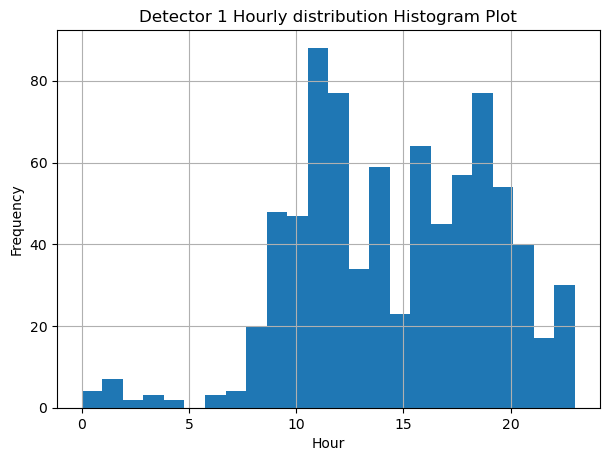

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Detector_1['Hour'].plot(kind='hist', bins = 24)
plt.xlabel('Hour')
plt.title('Detector 1 Hourly distribution Histogram Plot')
plt.grid()


In [44]:
# defining data in interactive plots
trace1= go.Histogram(x=Detector_1['Hour'], nbinsx=24)
data = [trace1]
# defining layout
layout = go.Layout(title="Detectors 1 Hourly Distribution Histogram Plot")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

By plotting Histogram Hourly distribution of Detector 1 we can see that detector peak is in the afternoon around 11 Am and less triggered in the Morning (7 am -10 am) as compared with afternoon. There is also triggering  of detector 1 in the evening and are much less likely to be triggered during the night & early Morning.

Distribution of hours by using a density plot for Detector 1

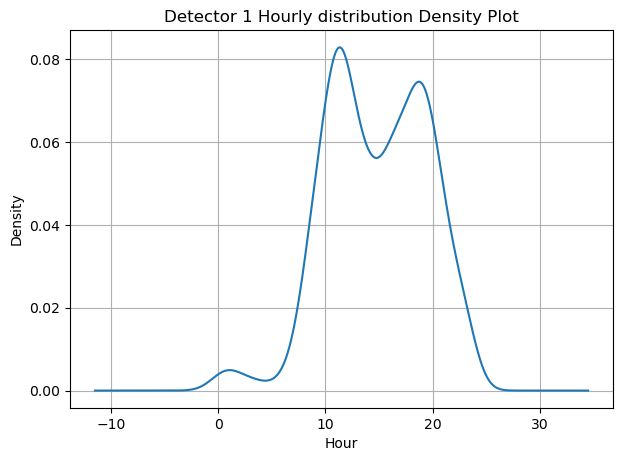

In [67]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Detector_1['Hour'].plot(kind='kde')
plt.xlabel('Hour')
plt.title('Detector 1 Hourly distribution Density Plot')
plt.grid()


Similarly from density plot by plotting  Hourly distribution of Detector 1 we can see that detector peak is in the afternoon around 11 Am and are much less likely to be triggered during the night and early Morning.

Histogram plot for detector 2. Hourly distribution by using a hist plot.

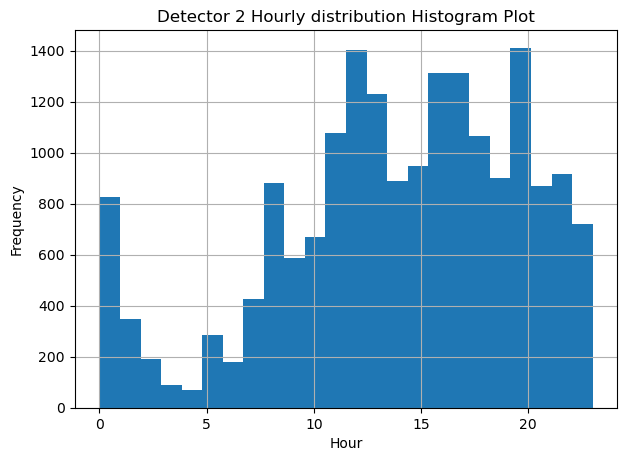

In [73]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Detector_2['Hour'].plot(kind='hist', bins = 24)
plt.xlabel('Hour')
plt.title('Detector 2 Hourly distribution Histogram Plot')
plt.grid()

In [45]:
# defining data in interactive plots
trace1= go.Histogram(x=Detector_2['Hour'], nbinsx=24)
data = [trace1]
# defining layout
layout = go.Layout(title="Detectors 2 Hourly Distribution Histogram Plot")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

By plotting Histogram Hourly distribution of Detector 2 we can see that detector 2 peak is in the afternoon (around 11 Am and 12 PM) and night ( 7pm -8pm). There is also triggering in the evening and are much less likely to be triggered during the night & early Morning.For Detector 2 a similar pattern exists except there are a lot more triggering at night and early morning as compared with Detector 1

Distribution of hours by using a density plot for Detector 2

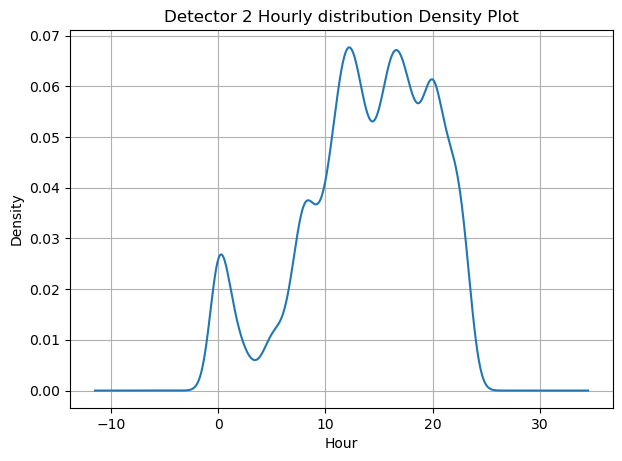

In [69]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Detector_2['Hour'].plot(kind='kde')
plt.xlabel('Hour')
plt.title('Detector 2 Hourly distribution Density Plot')
plt.grid()

Similarly from density plot by plotting Hourly distribution of Detector 2 we can see that detector peak is in the afternoon (around 11 Am and 12 PM) & and night ( 7pm -8pm) and are much less likely to be triggered during the night and early Morning.



Histogram plot for detector 3. Hourly distribution by using a hist plot.

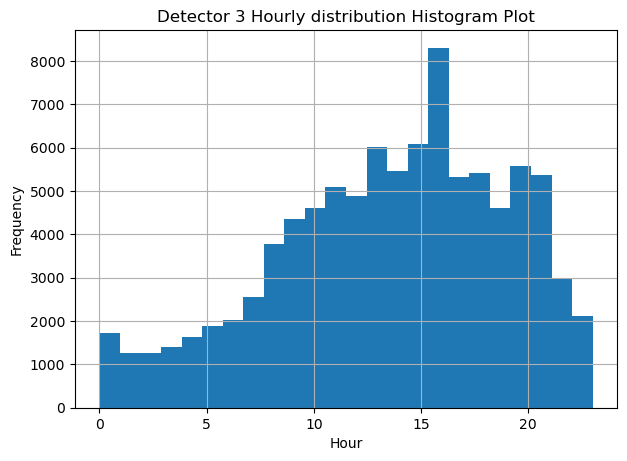

In [71]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Detector_3['Hour'].plot(kind='hist', bins=24)
plt.xlabel('Hour')
plt.title('Detector 3 Hourly distribution Histogram Plot')
plt.grid()

In [46]:
# defining data in interactive plots
trace1= go.Histogram(x=Detector_3['Hour'], nbinsx=24)
data = [trace1]
# defining layout
layout = go.Layout(title="Detectors 3 Hourly Distribution Histogram Plot")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)

By plotting Histogram Hourly distribution of Detector 3 we can see that detector peak is in the afternoon and evening (15:30 ( 3.30 pm) - 16:30(4.30 pm)) and less triggered in the Morning as compared with afternoon. There is also triggering  of detector 3 in the evening and are much less likely to be triggered during the night & early Morning.For Detector 3 also a similar pattern exists except there are a lot more triggering at night and early morning as compared with Detector 1

Distribution of hours by using a density plot for Detector 3

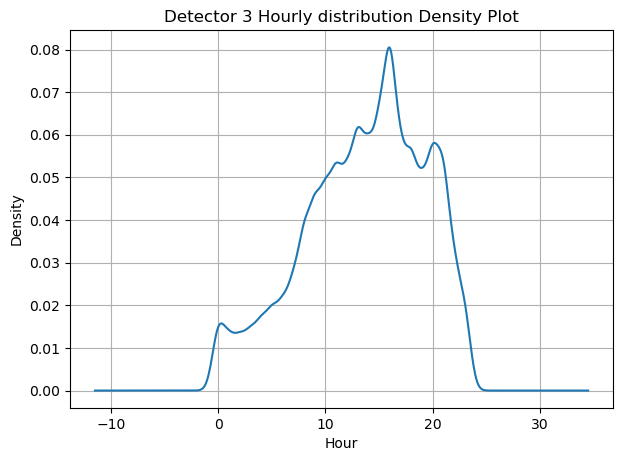

In [72]:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

Detector_3['Hour'].plot(kind='kde')
plt.xlabel('Hour')
plt.title('Detector 3 Hourly distribution Density Plot')
plt.grid()

Similarly from density plot by plotting Hourly distribution of Detector 3 we can see that detector peak is in the afternoon and evening (15:30 ( 3.30 pm) - 16:30(4.30 pm)) are much less likely to be triggered during the night and early Morning.


In this section we plotted the hourly distribution of each detector by histogram & density plot. Plotting the hourly distribution for each detector shows us that, in general, the detectors peak in the afternoon and are much less likely to be triggered during the night and early morning which may implicate that the triggering objects are biological in nature (or tied to the day-night cycle)

# 4. Hourly Analysis

Reading data from detect_1 , detect_2 and detect_3. These are Detector_1, Detector_2 and Detector_3 without setting DateTime as index.We mentioned in part1 already detect_1 = Detector_1, detect_2 = Detector_2, detect_3 = Detector_3. So we need to call data from there.

In [47]:
detect_1

,DateTime,Year,Month,Date,Hour,Minute,Second
0,2020-04-19 11:37:00,2020,4,19,11,37,0
2,2020-04-21 13:55:00,2020,4,21,13,55,0
3,2020-04-21 14:37:00,2020,4,21,14,37,0
4,2020-04-22 08:40:00,2020,4,22,8,40,0
5,2020-04-22 13:26:00,2020,4,22,13,26,0
...,...,...,...,...,...,...,...
830,2020-04-25 18:27:00,2020,4,25,18,27,0
831,2020-04-25 18:47:00,2020,4,25,18,47,0
832,2020-04-25 18:51:00,2020,4,25,18,51,0
833,2020-04-25 19:16:00,2020,4,25,19,16,0


Reading data from detect_2

In [48]:
detect_2

,DateTime,Year,Month,Date,Hour,Minute,Second
0,2020-04-04 11:05:39,2020,4,4,11,5,39
1,2020-04-04 11:05:42,2020,4,4,11,5,42
2,2020-04-04 11:05:45,2020,4,4,11,5,45
3,2020-04-04 11:05:54,2020,4,4,11,5,54
4,2020-04-04 11:06:02,2020,4,4,11,6,2
...,...,...,...,...,...,...,...
18874,2020-05-04 21:06:25,2020,5,4,21,6,25
18875,2020-05-04 21:12:59,2020,5,4,21,12,59
18876,2020-05-04 21:13:40,2020,5,4,21,13,40
18877,2020-05-04 21:14:25,2020,5,4,21,14,25


Reading data from detect_3

In [49]:
detect_3

,DateTime,Year,Month,Date,Hour,Minute,Second
0,2020-03-27 18:23:00,2020,3,27,18,23,0
1,2020-03-27 18:23:04,2020,3,27,18,23,4
2,2020-03-27 18:23:19,2020,3,27,18,23,19
3,2020-03-27 18:23:22,2020,3,27,18,23,22
4,2020-03-27 18:23:25,2020,3,27,18,23,25
...,...,...,...,...,...,...,...
2131,2020-04-03 15:25:48,2020,4,3,15,25,48
2132,2020-04-03 15:26:01,2020,4,3,15,26,1
2133,2020-04-03 15:26:04,2020,4,3,15,26,4
2134,2020-04-03 15:26:12,2020,4,3,15,26,12


In [50]:
def aggregate_series(dfs, freq):
        """
        computes the given time aggregate for each of the Dataframes in the list and returns a list with
        the corresponding series.
        DataFrames must contain atleast two columns with the time series data in a "DateTime" column.
        
        Parameters:
             dfs(list): a list of Dataframes
             time_agg(str): a str with desired time aggregation
             
        Returns:
            dfs(list): a list of series with desired time aggregation
        """
        for i, df in enumerate(dfs):
            dfs[i] = df.sort_values(by="DateTime").groupby(pd.Grouper(key="DateTime", freq='H')).count().iloc[:,0]
        
        return dfs

d1, d2, d3 are grouped by DateTime on hourly basis and got freq count for Year, Month, Date, Hour,Minute and Second 

In [51]:
d1 = detect_1.sort_values(by="DateTime").groupby(pd.Grouper(key="DateTime", freq='H')).count()
d2 = detect_2.sort_values(by="DateTime").groupby(pd.Grouper(key="DateTime", freq='H')).count()
d3 = detect_3.sort_values(by="DateTime").groupby(pd.Grouper(key="DateTime", freq='H')).count()

In [52]:
d1

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-19 11:00:00,2,2,2,2,2,2
2020-04-19 12:00:00,0,0,0,0,0,0
2020-04-19 13:00:00,0,0,0,0,0,0
2020-04-19 14:00:00,0,0,0,0,0,0
2020-04-19 15:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2020-05-04 16:00:00,3,3,3,3,3,3
2020-05-04 17:00:00,3,3,3,3,3,3
2020-05-04 18:00:00,12,12,12,12,12,12


In [53]:
d2

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-04-04 11:00:00,99,99,99,99,99,99
2020-04-04 12:00:00,28,28,28,28,28,28
2020-04-04 13:00:00,23,23,23,23,23,23
2020-04-04 14:00:00,42,42,42,42,42,42
2020-04-04 15:00:00,15,15,15,15,15,15
...,...,...,...,...,...,...
2020-05-04 17:00:00,19,19,19,19,19,19
2020-05-04 18:00:00,21,21,21,21,21,21
2020-05-04 19:00:00,13,13,13,13,13,13


In [54]:
d3

,Year,Month,Date,Hour,Minute,Second
DateTime,,,,,,
2020-03-21 19:00:00,15,15,15,15,15,15
2020-03-21 20:00:00,77,77,77,77,77,77
2020-03-21 21:00:00,16,16,16,16,16,16
2020-03-21 22:00:00,30,30,30,30,30,30
2020-03-21 23:00:00,27,27,27,27,27,27
...,...,...,...,...,...,...
2020-05-01 17:00:00,106,106,106,106,106,106
2020-05-01 18:00:00,32,32,32,32,32,32
2020-05-01 19:00:00,112,112,112,112,112,112


In [55]:
d1.dtypes

Year      int64
Month     int64
Date      int64
Hour      int64
Minute    int64
Second    int64
dtype: object

In [56]:
d2.dtypes

Year      int64
Month     int64
Date      int64
Hour      int64
Minute    int64
Second    int64
dtype: object

In [57]:
d3.dtypes

Year      int64
Month     int64
Date      int64
Hour      int64
Minute    int64
Second    int64
dtype: object

For each pair of data sets, check what portion of the data sets overlap in counts per datetime bucket

Checking data sets d1 and d2

In [58]:
inner_merged_total1 = pd.merge(d1, d2, on=["DateTime","Hour"],indicator=False)
inner_merged_total1

,Year_x,Month_x,Date_x,Hour,Minute_x,Second_x,Year_y,Month_y,Date_y,Minute_y,Second_y
DateTime,,,,,,,,,,,
2020-04-20 05:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-21 02:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-21 04:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-21 05:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-21 06:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-22 03:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-22 04:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-22 05:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-22 06:00:00,0,0,0,0,0,0,0,0,0,0,0


In [59]:
inner_merged_total1.shape

(54, 11)

There are 54 overlaps in counts per datetime bucket for d1 and d2

Checking data sets d2 and d3

In [60]:
inner_merged_total2 = pd.merge(d2, d3, on=["DateTime", "Hour"], indicator=False)
inner_merged_total2

,Year_x,Month_x,Date_x,Hour,Minute_x,Second_x,Year_y,Month_y,Date_y,Minute_y,Second_y
DateTime,,,,,,,,,,,
2020-04-04 20:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-05 03:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 01:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 02:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 03:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 04:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 05:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 06:00:00,0,0,0,0,0,0,0,0,0,0,0
2020-04-06 07:00:00,0,0,0,0,0,0,0,0,0,0,0


In [61]:
inner_merged_total2.shape

(25, 11)

There are 25 overlaps in counts per datetime bucket for d2 and d3

Checking datasets d1 and d3

In [62]:
inner_merged_total3 = pd.merge(d1, d3, on=["DateTime", "Hour"], indicator=False)
inner_merged_total3

,Year_x,Month_x,Date_x,Hour,Minute_x,Second_x,Year_y,Month_y,Date_y,Minute_y,Second_y
DateTime,,,,,,,,,,,


# 5. Hourly analysis plot of shared period

For plotting purposes (subplots) I changed columns names for d1, d2, d3 as follows :

In [63]:
d1.columns = ['Year_1', 'Month_1','Date_1', 'Hour_1','Minute_1','Second_1']
d1

,Year_1,Month_1,Date_1,Hour_1,Minute_1,Second_1
DateTime,,,,,,
2020-04-19 11:00:00,2,2,2,2,2,2
2020-04-19 12:00:00,0,0,0,0,0,0
2020-04-19 13:00:00,0,0,0,0,0,0
2020-04-19 14:00:00,0,0,0,0,0,0
2020-04-19 15:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2020-05-04 16:00:00,3,3,3,3,3,3
2020-05-04 17:00:00,3,3,3,3,3,3
2020-05-04 18:00:00,12,12,12,12,12,12


In [64]:
d2.columns = ['Year_2', 'Month_2','Date_2', 'Hour_2','Minute_2','Second_2']
d2

,Year_2,Month_2,Date_2,Hour_2,Minute_2,Second_2
DateTime,,,,,,
2020-04-04 11:00:00,99,99,99,99,99,99
2020-04-04 12:00:00,28,28,28,28,28,28
2020-04-04 13:00:00,23,23,23,23,23,23
2020-04-04 14:00:00,42,42,42,42,42,42
2020-04-04 15:00:00,15,15,15,15,15,15
...,...,...,...,...,...,...
2020-05-04 17:00:00,19,19,19,19,19,19
2020-05-04 18:00:00,21,21,21,21,21,21
2020-05-04 19:00:00,13,13,13,13,13,13


In [65]:
d3.columns = ['Year_3', 'Month_3','Date_3', 'Hour_3','Minute_3','Second_3']
d3

,Year_3,Month_3,Date_3,Hour_3,Minute_3,Second_3
DateTime,,,,,,
2020-03-21 19:00:00,15,15,15,15,15,15
2020-03-21 20:00:00,77,77,77,77,77,77
2020-03-21 21:00:00,16,16,16,16,16,16
2020-03-21 22:00:00,30,30,30,30,30,30
2020-03-21 23:00:00,27,27,27,27,27,27
...,...,...,...,...,...,...
2020-05-01 17:00:00,106,106,106,106,106,106
2020-05-01 18:00:00,32,32,32,32,32,32
2020-05-01 19:00:00,112,112,112,112,112,112


For combined hourly analysis, cocncated d1, d2 and d3

In [66]:
combined_hourly = pd.concat([d1,d2,d3],axis=1, join ="inner")

In [56]:
combined_hourly.to_csv("C:\\users\\Keeru\\Desktop\\sensors.csv")
combined_hourly=pd.read_csv("C:\\users\\Keeru\\Desktop\\sensors.csv")
print(combined_hourly)

                DateTime  Year_1  Month_1  Date_1  Hour_1  Minute_1  Second_1  \
0    2020-04-19 11:00:00       2        2       2       2         2         2   
1    2020-04-19 12:00:00       0        0       0       0         0         0   
2    2020-04-19 13:00:00       0        0       0       0         0         0   
3    2020-04-19 14:00:00       0        0       0       0         0         0   
4    2020-04-19 15:00:00       0        0       0       0         0         0   
..                   ...     ...      ...     ...     ...       ...       ...   
294  2020-05-01 17:00:00       6        6       6       6         6         6   
295  2020-05-01 18:00:00       8        8       8       8         8         8   
296  2020-05-01 19:00:00       4        4       4       4         4         4   
297  2020-05-01 20:00:00       2        2       2       2         2         2   
298  2020-05-01 21:00:00       4        4       4       4         4         4   

     Year_2  Month_2  Date_

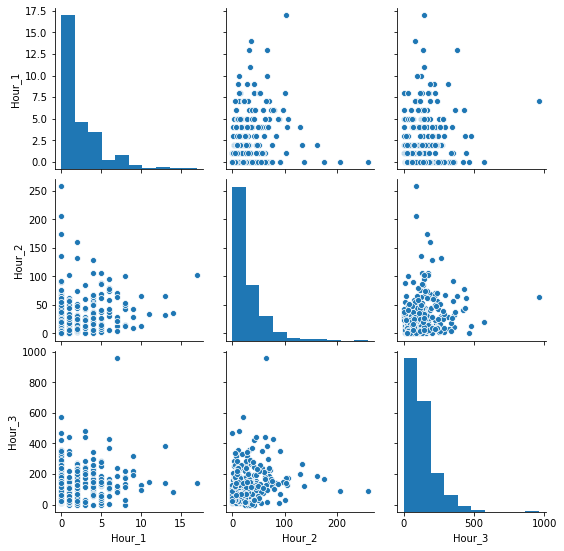

In [71]:
sns.pairplot(combined_hourly[['Hour_1','Hour_2','Hour_3']])

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'DateTime')]

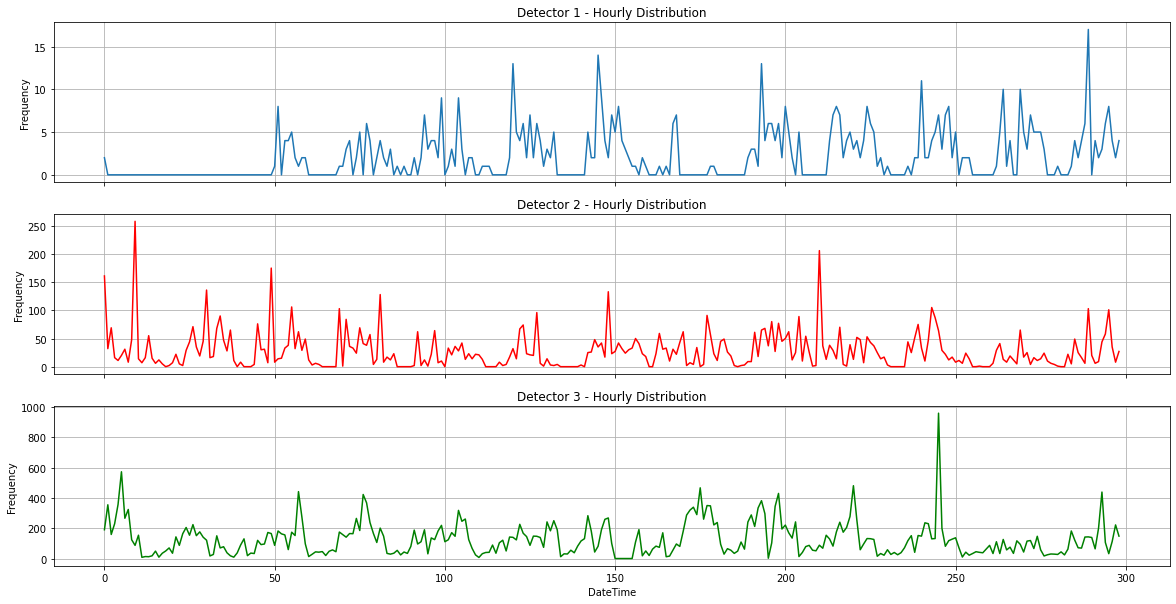

In [57]:

plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots (nrows=3,ncols=1,figsize=(20,10))

combined_hourly["Hour_1"].plot(ax=axes[0],sharex=True)
axes[0].set_title('Detector 1 - Hourly Distribution')
axes[0].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_2"].plot(ax=axes[1],sharex=True, color=['red'])
axes[1].set_title('Detector 2 - Hourly Distribution')
axes[1].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_3"].plot(ax=axes[2],sharex=True, color=['green'])
axes[2].set_title('Detector 3 - Hourly Distribution')
axes[2].set(xlabel='DateTime',ylabel='Frequency')


These are the plots for Detector 1, Detector 2 and Detector 3 Hourly distribution (Freq per datetime bucket)

Go into more detailed analysis each portion of the data sets upto location [:100]

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'DateTime')]

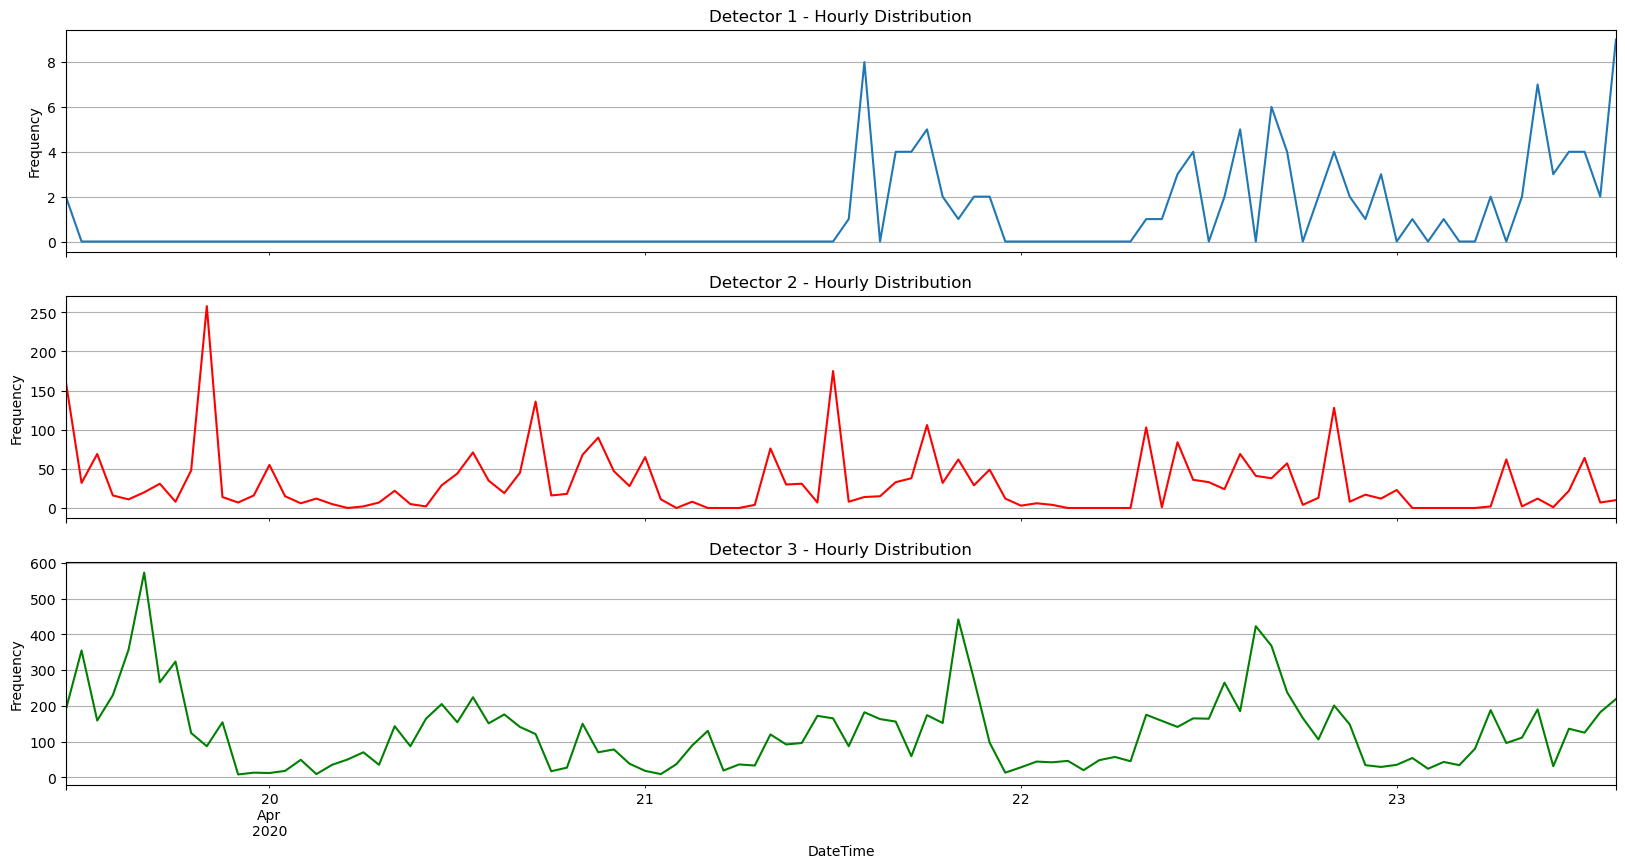

In [135]:
fig, axes = plt.subplots (nrows=3,ncols=1,figsize=(20,10))

combined_hourly["Hour_1"].iloc[:100].plot(ax=axes[0],sharex=True)
axes[0].set_title('Detector 1 - Hourly Distribution')
axes[0].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_2"].iloc[:100].plot(ax=axes[1],sharex=True, color=['red'])
axes[1].set_title('Detector 2 - Hourly Distribution')
axes[1].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_3"].iloc[:100].plot(ax=axes[2],sharex=True, color=['green'])
axes[2].set_title('Detector 3 - Hourly Distribution')
axes[2].set(xlabel='DateTime',ylabel='Frequency')

In this plot we can analyze that there is some overlap for Detector_2 and Detector_3 before 20 April, 2020 

More detailed analysis each portion of the data sets upto location [100:200]

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'DateTime')]

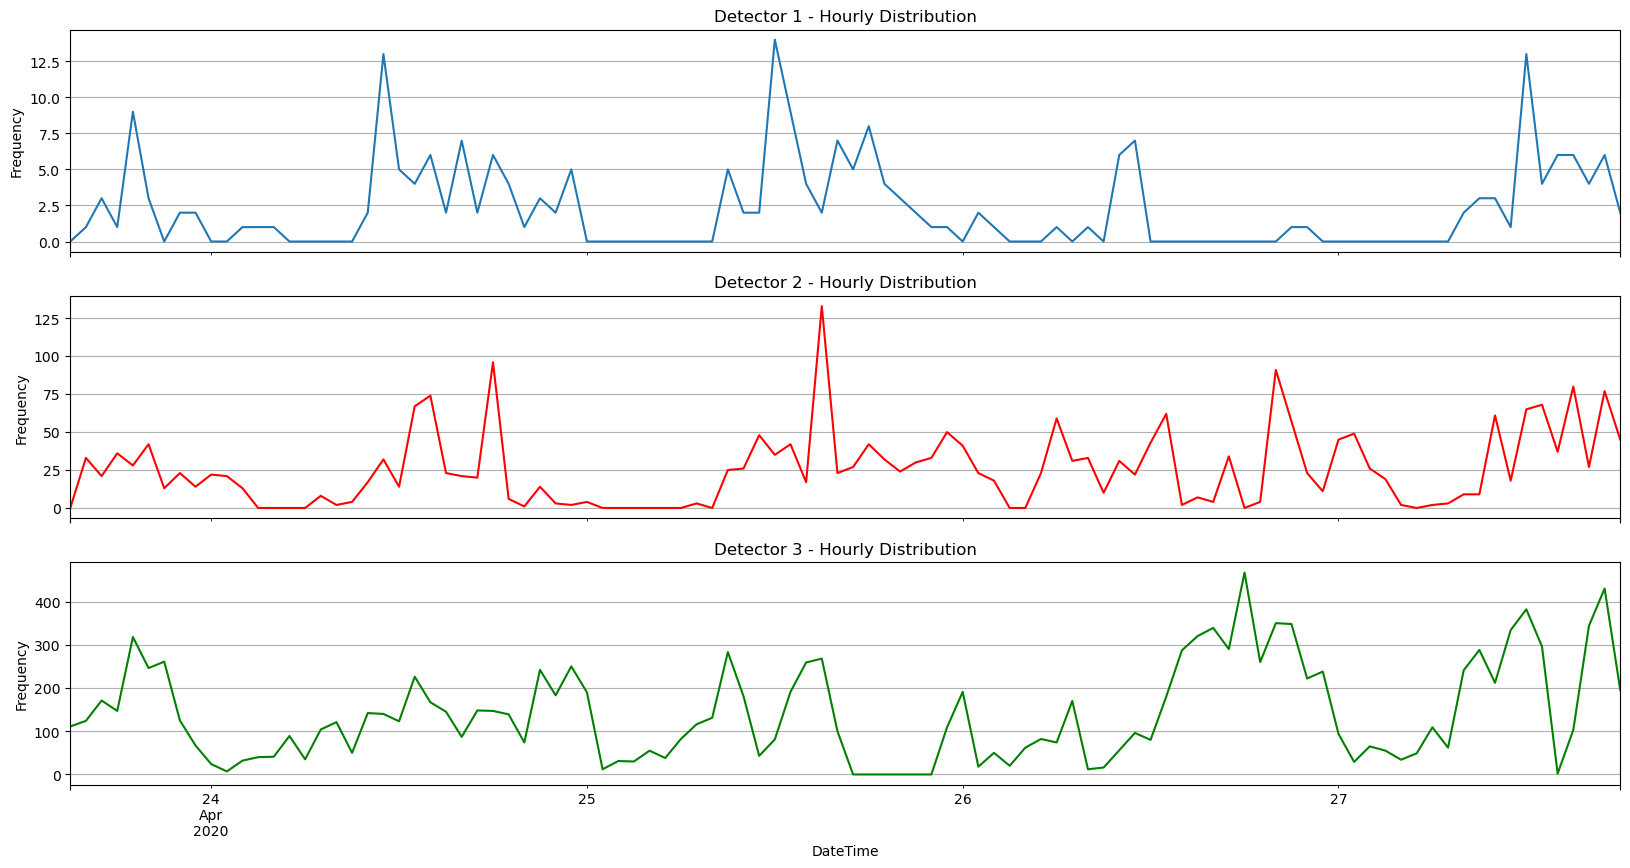

In [136]:
fig, axes = plt.subplots (nrows=3,ncols=1,figsize=(20,10))

combined_hourly["Hour_1"].iloc[100:200].plot(ax=axes[0],sharex=True)
axes[0].set_title('Detector 1 - Hourly Distribution')
axes[0].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_2"].iloc[100:200].plot(ax=axes[1],sharex=True, color=['red'])
axes[1].set_title('Detector 2 - Hourly Distribution')
axes[1].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_3"].iloc[100:200].plot(ax=axes[2],sharex=True, color=['green'])
axes[2].set_title('Detector 3 - Hourly Distribution')
axes[2].set(xlabel='DateTime',ylabel='Frequency')

In this plot we can analyze that there is some overlap for Detector_1 and Detector_2 between 24 April, 2020 and 27 April, 2020.
And some overlap for Detector_1 and Detector_3 between 25 April 2020 and 28 April 2020.

More detailed analysis each portion of the data sets upto location [200:300]

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'DateTime')]

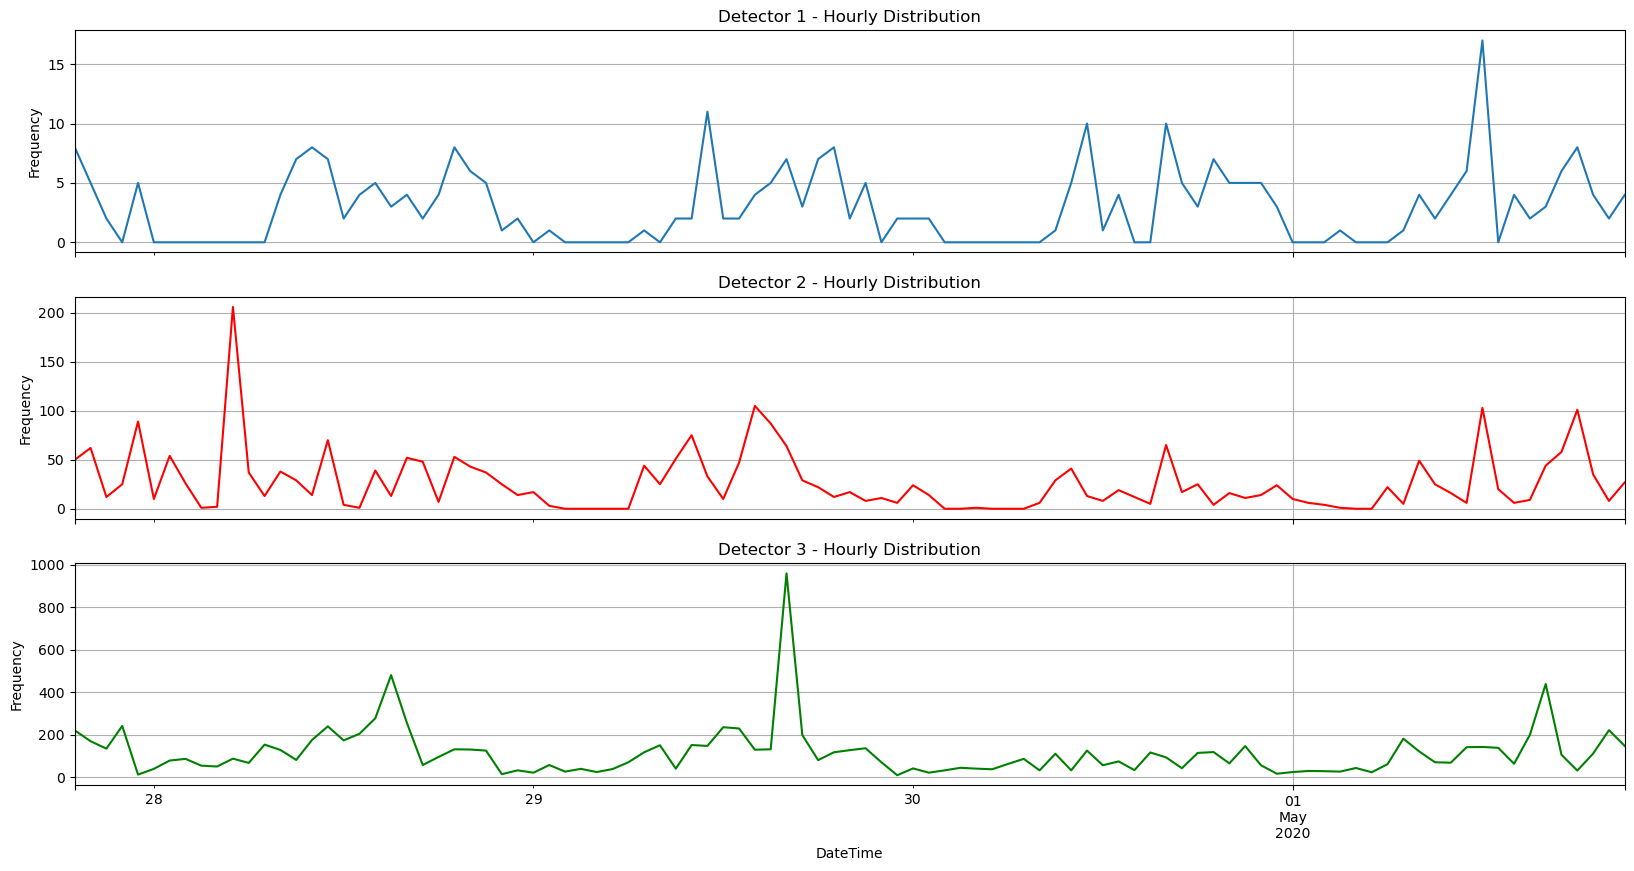

In [141]:
fig, axes = plt.subplots (nrows=3,ncols=1,figsize=(20,10))

combined_hourly["Hour_1"].iloc[200:300].plot(ax=axes[0],sharex=True)
axes[0].set_title('Detector 1 - Hourly Distribution')
axes[0].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_2"].iloc[200:300].plot(ax=axes[1],sharex=True, color=['red'])
axes[1].set_title('Detector 2 - Hourly Distribution')
axes[1].set(xlabel='DateTime',ylabel='Frequency')

combined_hourly["Hour_3"].iloc[200:300].plot(ax=axes[2],sharex=True, color=['green'])
axes[2].set_title('Detector 3 - Hourly Distribution')
axes[2].set(xlabel='DateTime',ylabel='Frequency')

In this plot we can analyze that there is some overlap for Detector_1 and Detector_2 between 29 April 2020 and 01 May 2020.

Again going into more detail. Firstly plotting Detector 1 & Detector 2 Hourly distribution

Text(0.5, 1.0, 'Detector 1 & Detector 2 Hourly distribution')

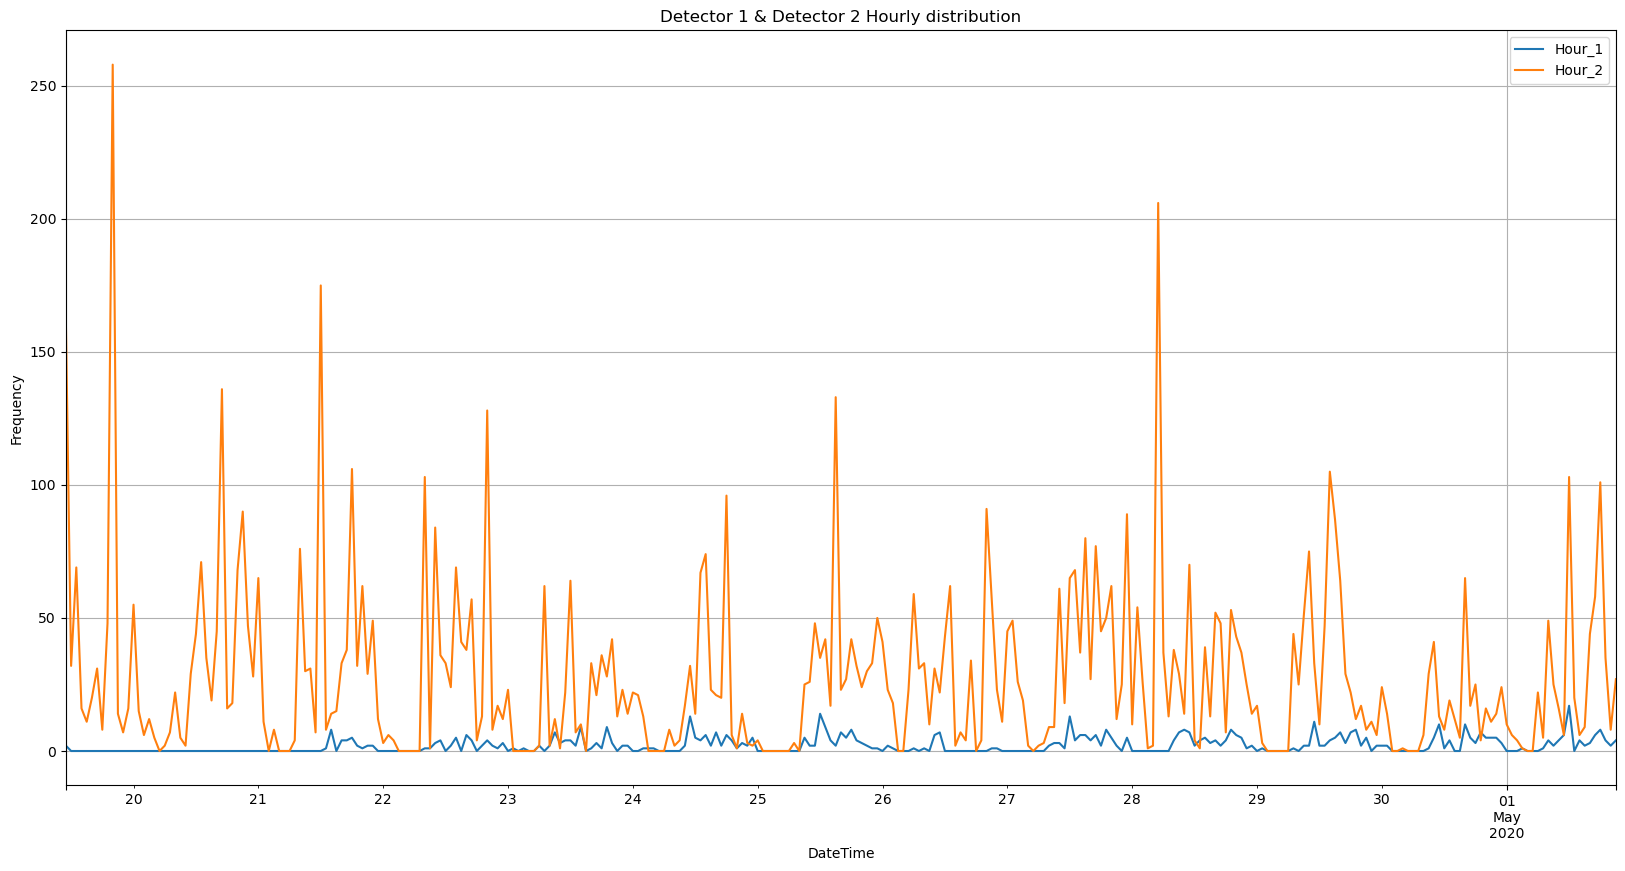

In [160]:
# plotting Detector 1 & Detector 2 Hourly distribution
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})

combined_hourly[['Hour_1','Hour_2']].plot()
plt.ylabel('Frequency')
plt.title('Detector 1 & Detector 2 Hourly distribution')

In this plot of Hourly distribution of Detector 1 & Detector 2 we can see some overlaps. Most of the overlap occurs at 0 frequency

Detector 2 & Detector 3 Hourly distribution

Text(0.5, 1.0, 'Detector 2 & Detector 3 Hourly distribution')

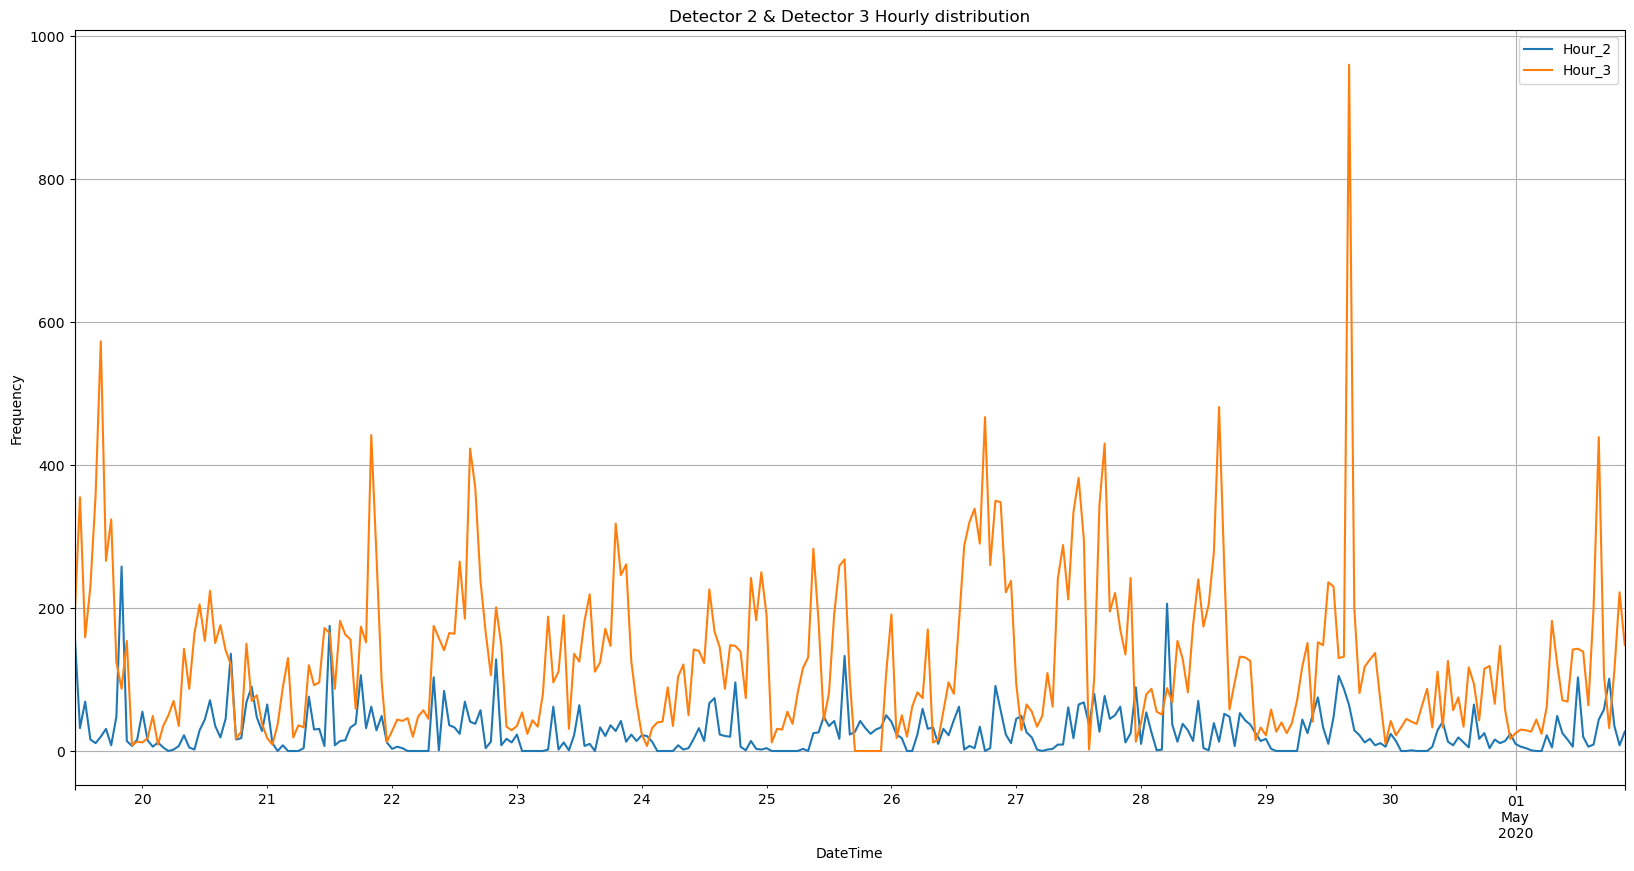

In [163]:
# plotting Detector 2 & Detector 3 Hourly distribution
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})

combined_hourly[['Hour_2','Hour_3']].plot()
plt.ylabel('Frequency')
plt.title('Detector 2 & Detector 3 Hourly distribution')

In this plot we can see that pattern of both detector looks similar. Detector 2 hourly distribution is having low frequency as compared with Detector 3. Here also we can see some overlaps

Detector 1 & Detector 3 Hourly distribution

Text(0.5, 1.0, 'Detector 1 & Detector 3 Hourly distribution')

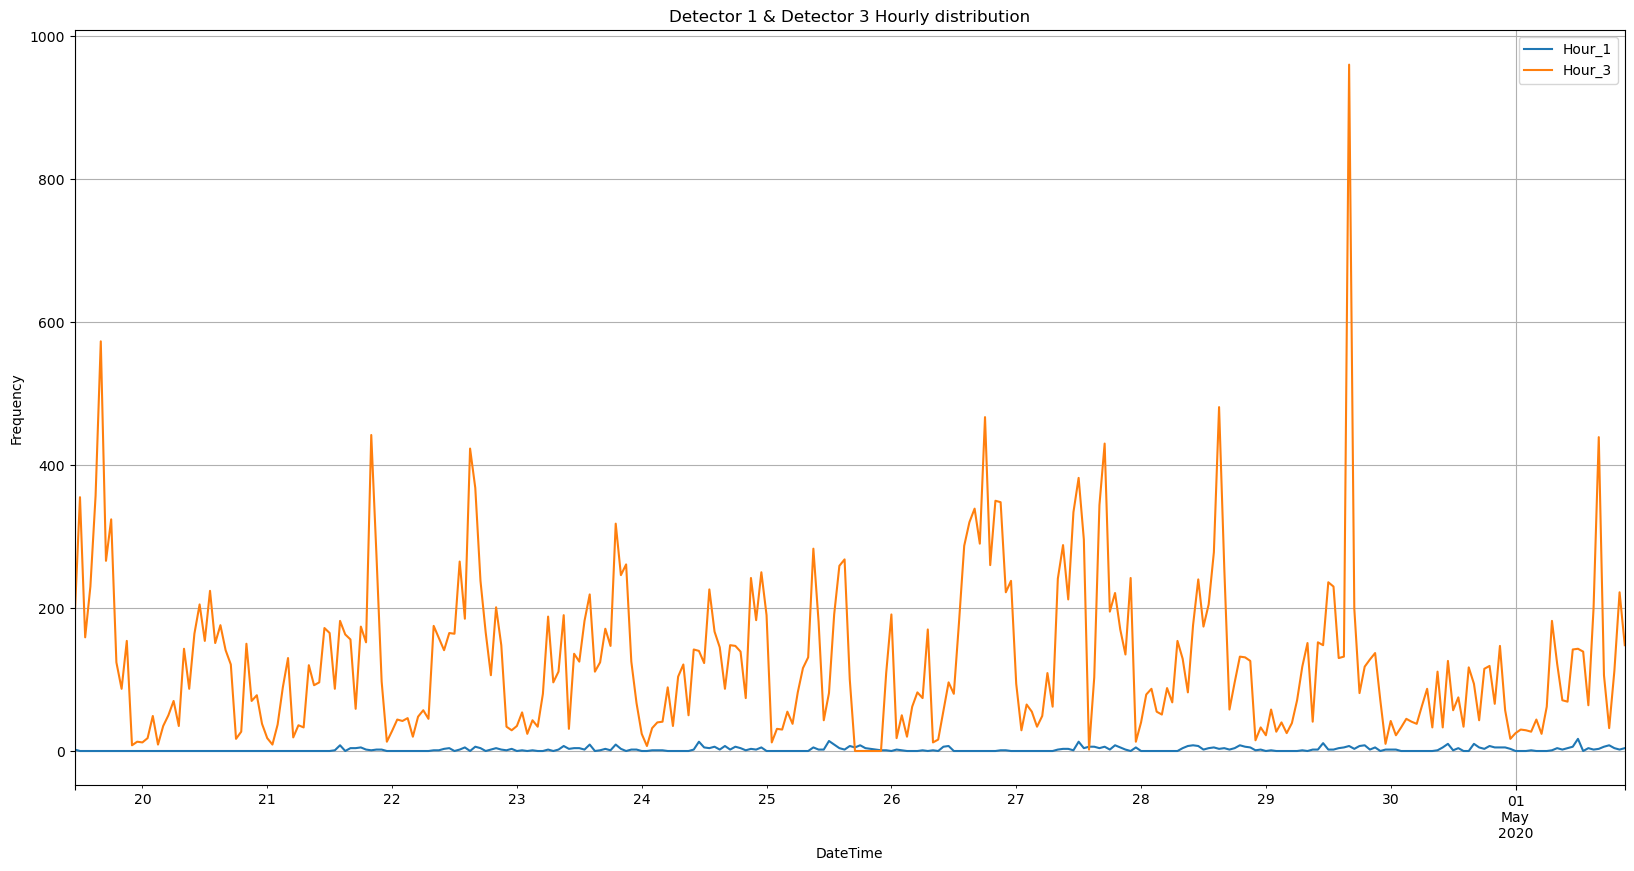

In [164]:
plt.rcParams.update({'figure.figsize':(20,10), 'figure.dpi':100})
combined_hourly[['Hour_1','Hour_3']].plot()
plt.ylabel('Frequency')
plt.title('Detector 1 & Detector 3 Hourly distribution')

In this plot of Hourly distribution of Detector 1 & Detector 3 we can see some overlap between 25 April 2020 and 28 April 2020.

In [72]:
# defining data in interactive plots
trace1= go.Histogram(x=combined_hourly['Hour_1'], nbinsx=24,histnorm='percent')
trace2 = go.Histogram(x=combined_hourly['Hour_2'], nbinsx=24,histnorm='percent')
trace3 = go.Histogram(x=combined_hourly['Hour_3'], nbinsx=24,histnorm='percent')
data = [trace1, trace2, trace3]
# defining layout
layout = go.Layout(title="Detectors Hourly Distribution Histogram Plot")
# defining figure and plotting
fig = go.Figure(data = data,layout = layout)
iplot(fig)



So by the Hourly analysis plot of shared period we find that data sets overlap in counts per datetime bucket. So we are going to find correlation by pearson method. In Section 3 we already discussed that Plotting the hourly distribution for each detector shows us that, in general, the detectors peak in the afternoon and are much less likely to be triggered during the night and early morning which may implicate that the triggering objects are biological in nature (or tied to the day-night cycle). So I think more data sets overlap in counts per datetime bucket in the afternoon .

# 6. Identifying Correlations

We are finding correlation by method pearson
combined hourly means cocncated d1 (Detector_1), d2(Detector_2) and d3 (Detector_3)

In [1473]:
combined_hourly.corr(method ='pearson')

,Year_1,Month_1,Date_1,Hour_1,Minute_1,Second_1,Year_2,Month_2,Date_2,Hour_2,Minute_2,Second_2,Year_3,Month_3,Date_3,Hour_3,Minute_3,Second_3
Year_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,0.201811,0.201811,0.201811,0.201811,0.201811,0.201811
Month_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,0.201811,0.201811,0.201811,0.201811,0.201811,0.201811
Date_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,0.201811,0.201811,0.201811,0.201811,0.201811,0.201811
Hour_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,0.201811,0.201811,0.201811,0.201811,0.201811,0.201811
Minute_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,0.201811,0.201811,0.201811,0.201811,0.201811,0.201811
Second_1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,0.201811,0.201811,0.201811,0.201811,0.201811,0.201811
Year_2,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200548,0.200548,0.200548,0.200548,0.200548,0.200548
Month_2,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200548,0.200548,0.200548,0.200548,0.200548,0.200548
Date_2,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200548,0.200548,0.200548,0.200548,0.200548,0.200548
Hour_2,0.231235,0.231235,0.231235,0.231235,0.231235,0.231235,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.200548,0.200548,0.200548,0.200548,0.200548,0.200548


The output dataframe can be interpreted as for any cell, row variable correlation with the column variable is the value of the cell.The correlation of a variable with itself is 1. For that reason all the diagonal values are 1.00

Here we are looking for Hour correlation. 
Taking row Hour_1 of Detector_1 and Column Hour_2 of Detector_2 we can find Pearson correlation is 0.231235.
Taking row Hour_1 of Detector_1 and Column Hour_3 of Detector_3 we can find Pearson correlation is 0.201811.
Taking row Hour_2 of Detector_2 and Column Hour_3 of Detector_3 we can find Pearson correlation is 0.200548.

So. we find Pearson’s r Value Correlation between Hour of each detector and got values greater than 0 
values .Greater than 0 means positive correlation.So identify that there are correlations, it means that the detectors are detecting in the same area. 

Making a correlation matrix is a great way to summarize all the data. In this way, you can pick the best features and use them for further processing your data.

Pandas’ DataFrame class has the method corr() that computes three different correlation coefficients. Using any of the following methods: Pearson correlation, Kendall Tau correlation, and Spearman correlation method. The correlation coefficients calculated using these methods vary from +1 to -1.

In [143]:
combined_hourly[['Hour_1','Hour_2','Hour_3']].corr()

,Hour_1,Hour_2,Hour_3
Hour_1,1.000000,0.231235,0.201811
Hour_2,0.231235,1.000000,0.200548
Hour_3,0.201811,0.200548,1.000000


A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

# 7.Heatmaps

Visualization is generally easier to understand than reading tabular data, heatmaps are typically used to visualize correlation matrices. A simple way to plot a heatmap in Python is by importing and implementing the Seaborn library.

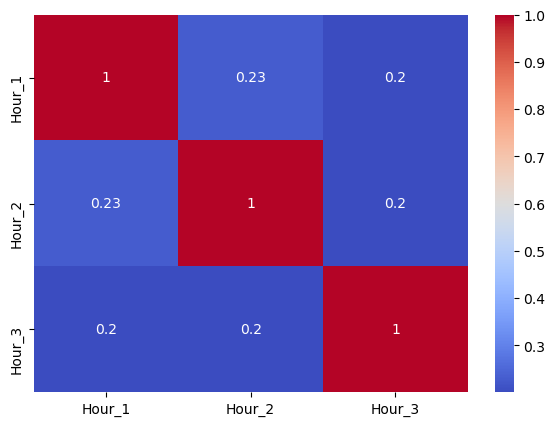

In [144]:
import seaborn as sns
sns.heatmap(combined_hourly[['Hour_1','Hour_2','Hour_3']].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

Dark red means positive, Dard Blue means negative. The stronger the color, the larger the correlation magnitude. So by using heatmaps we can visualize Hour correlation matrices of each detector.

# 8.Conclusion

Hence, in this Project, we learned how data is Cleans and wrangle in Python Programming Language. We have also learned how datasets are converted into data frames with a uniform format and datetime as the index.  Plotting the hourly distribution for each detector shows us that, in general, the detectors peak in the afternoon and are much less likely to be triggered during the night and early morning which may implicate that the triggering objects are biological in nature (or tied to the day-night cycle). Through Hourly analysis we find 
that data sets overlap in counts per datetime bucket.So identifed that there are correlations by Pearson's method, it means that the detectors are detecting in the same area. We understand visualization is generally easier to understand than reading tabular data, so here we use heatmaps to visualize correlation matrices.  Here we are mainly using four libraries- pandas, numpy, seaborn and matplotlib.pyplot. For finding lowest time resolution, we can study further the detection in the pairs